**ÉTAPE 0** : préparation des données

In [1]:
import pandas as pd 
import process
import numpy as np 
# Jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv(r'/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.fillna(0) # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

In [68]:
import warnings 


warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

lookback_window_0 = [0, 50]
number_of_clusters = 38
sigma = 10e-2
clustering_method = 'SPONGE' 
number_of_repetition = 20
number_of_window=50
evaluation_window = 5
eta_values = np.linspace(0.001, 0.02, 20)
np.set_printoptions(precision=4, suppress=True)

overall_return, PnL, portfolio_value, sharpe_ratio, daily_PnL = process.sliding_window(df_cleaned=df_cleaned, lookback_window_0=lookback_window_0, number_of_clusters=number_of_clusters, sigma=sigma, clustering_method=clustering_method, number_of_repetition=number_of_repetition, number_of_window=number_of_window, evaluation_window=evaluation_window, eta=eta_values[15])

1.0240751965165382
step 1
1.0302681699969092
step 2
1.0332884878655688
step 3
1.0347855108599675
step 4
1.025619891114687
step 5
1.0336843985288764
step 6
1.0418787408679488
step 7
1.035841809351462
step 8
1.040049750356484
step 9
1.037668511750643
step 10
1.0466863447399488
step 11
1.049346710075916
step 12
1.0598059640590354
step 13
1.0537754346341537
step 14
1.0602605180181044
step 15
1.0680874163231333
step 16
1.0724007093766428
step 17
1.0664816233474588
step 18
1.0609439687309683
step 19
1.073243084759951
step 20
1.0831704428260622
step 21
1.085396449752851
step 22
1.0834754359398697
step 23
1.0866577353560836
step 24
1.0984718166237328
step 25
1.0860587384969143
step 26
1.086001613431198
step 27
1.0889789827136387
step 28
1.0821700434120514
step 29
1.072804773028614
step 30
1.0760792639256154
step 31
1.0909235572885807
step 32
1.1032316928962485
step 33
1.1045902424892315
step 34
1.1097462743145299
step 35
1.1142047445733334
step 36
1.121663356824483
step 37
1.1273674594380734
s

In [69]:
PnL[-1], eta_values[15]

(0.21234788875177868, 0.016)

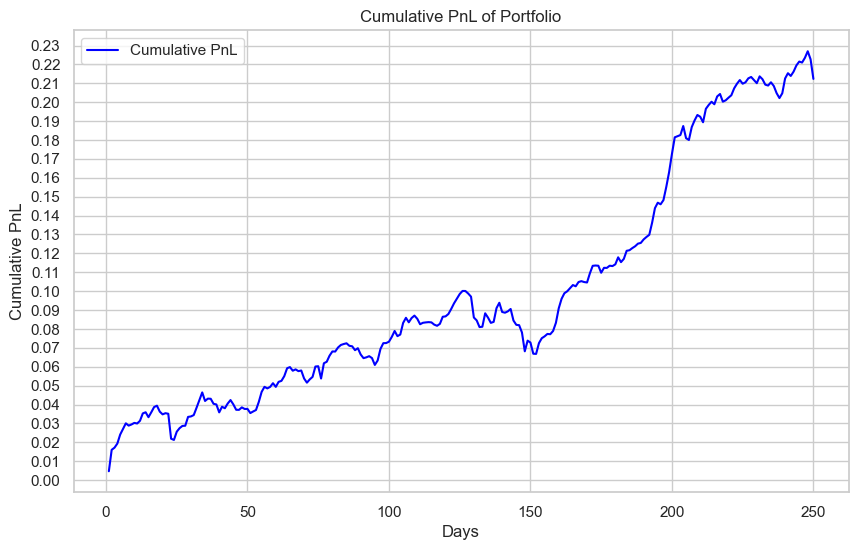

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer la PnL cumulative avec seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=days, y=PnL, label='Cumulative PnL', color='blue')

# Ajouter des titres et des légendes
plt.title('Cumulative PnL of Portfolio')
plt.xlabel('Days')
plt.ylabel('Cumulative PnL')

# Personnaliser l'axe des ordonnées avec un pas de 0.01
plt.yticks(np.arange(0, max(PnL) + 0.01, 0.01))

# Afficher le graphique
plt.show()

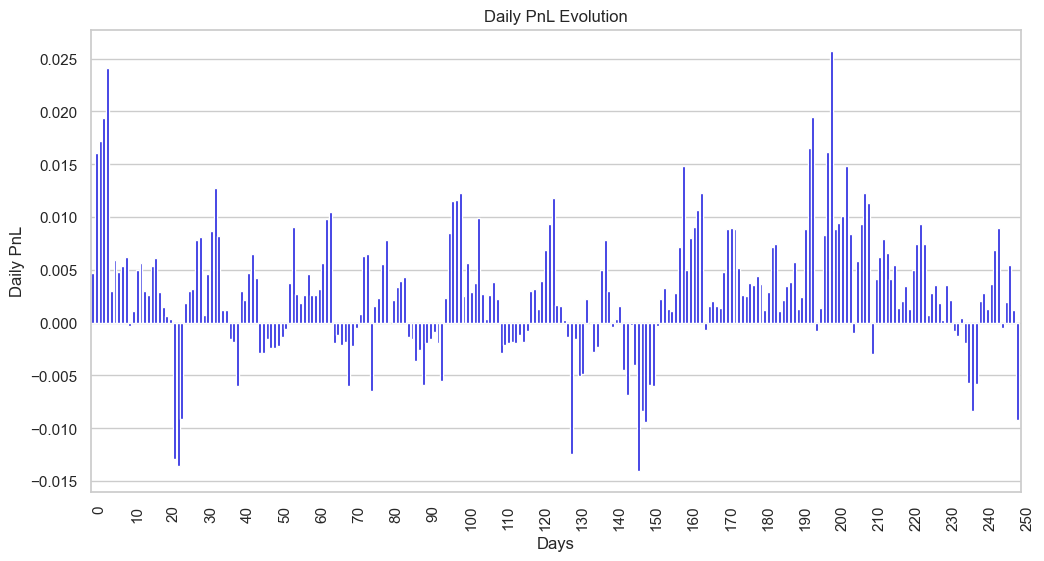

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(daily_PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer l'évolution quotidienne de la PnL sous forme de diagramme à barres avec seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=days, y=daily_PnL, color='blue', width=0.8)  # Ajustez la largeur ici

# Rotation des étiquettes de l'axe des abscisses de 45 degrés avec un ajustement
ax.set_xticks(np.arange(0,251,10))
ax.set_xticklabels(ax.get_xticks(), rotation=90, ha='right', rotation_mode='anchor')

# Ajouter des titres et des légendes
plt.title('Daily PnL Evolution')
plt.xlabel('Days')
plt.ylabel('Daily PnL')

# Afficher le graphique
plt.show()
